In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_frame_plotter(images, rows=5, cols=5):
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx])
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()

def straight_frame_plotter(images, idx, rows=2, cols=5):
    '''
    plots the 5 frames surrounding the image
    '''
    indices = range(idx-5, idx+5)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], vmin=0, vmax=30)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax, shrink=0.8)
    plt.show()

np.random.seed(42)

In [2]:
openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/openaq_cache/openaq_processed.npz')['data']
openaq.shape

(17544, 40, 40)

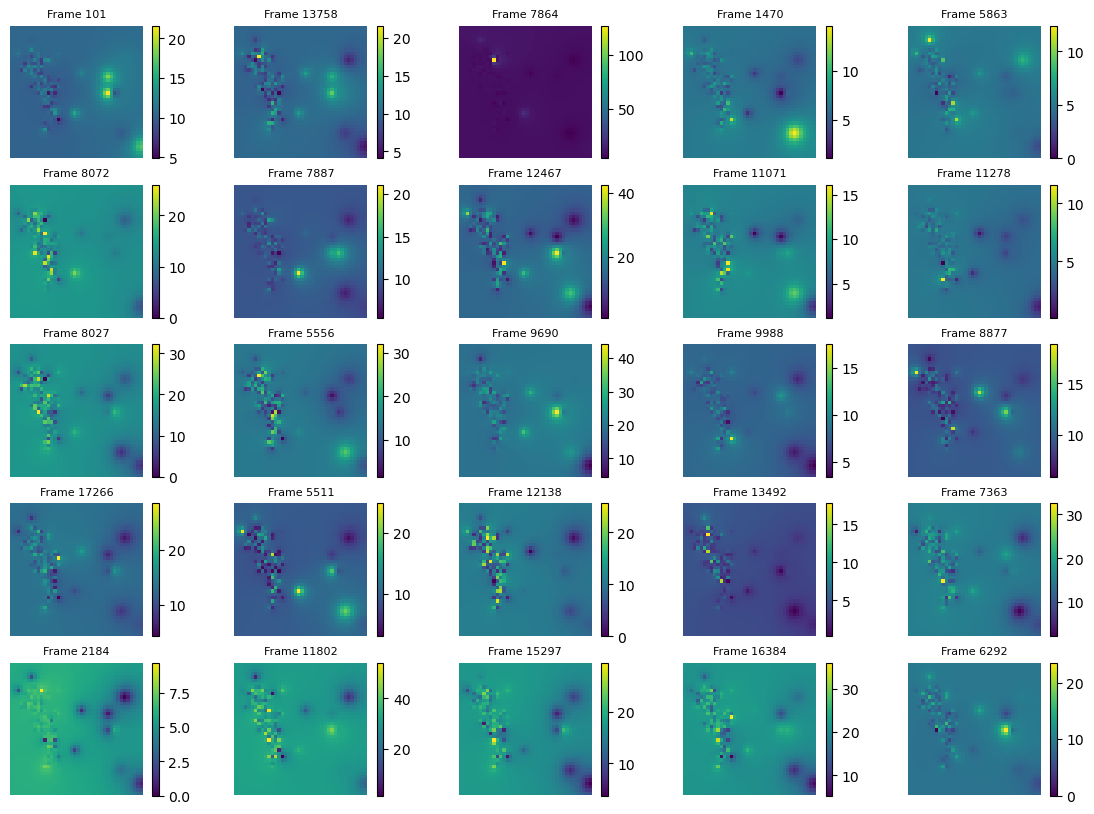

In [3]:
random_frame_plotter(openaq)

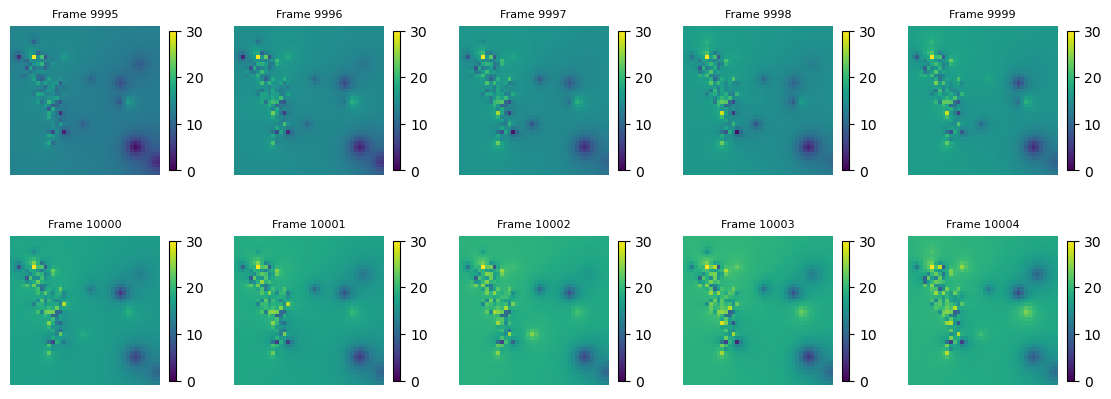

In [4]:
straight_frame_plotter(openaq, 10000)